# Exploratory Data Analysis

Notebook-driven EDA for the sampled 50k electronics reviews dataset.

## Cell 1 — Imports

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import re
import os

plt.style.use("ggplot")
sns.set_context("talk")

## Cell 2 — Load the Sampled 50k Reviews

In [2]:
data_path = "../artifacts/raw_data/electronics_sample_50k.json"

if not os.path.exists(data_path):
    raise FileNotFoundError(
        f"Could not find dataset at {data_path}. Please ensure the sampled file exists."
    )

records = []
with open(data_path, "r") as f:
    for line in f:
        records.append(json.loads(line))

df = pd.DataFrame(records)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


👉 This loads your 50k JSON-lines dataset into a DataFrame.

## Cell 3 — Basic Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      50000 non-null  object 
 1   asin            50000 non-null  object 
 2   reviewerName    49706 non-null  object 
 3   helpful         50000 non-null  object 
 4   reviewText      50000 non-null  object 
 5   overall         50000 non-null  float64
 6   summary         50000 non-null  object 
 7   unixReviewTime  50000 non-null  int64  
 8   reviewTime      50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


## Cell 4 — Check Missing Values

In [4]:
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      294
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

## Cell 5 — Review Length Analysis

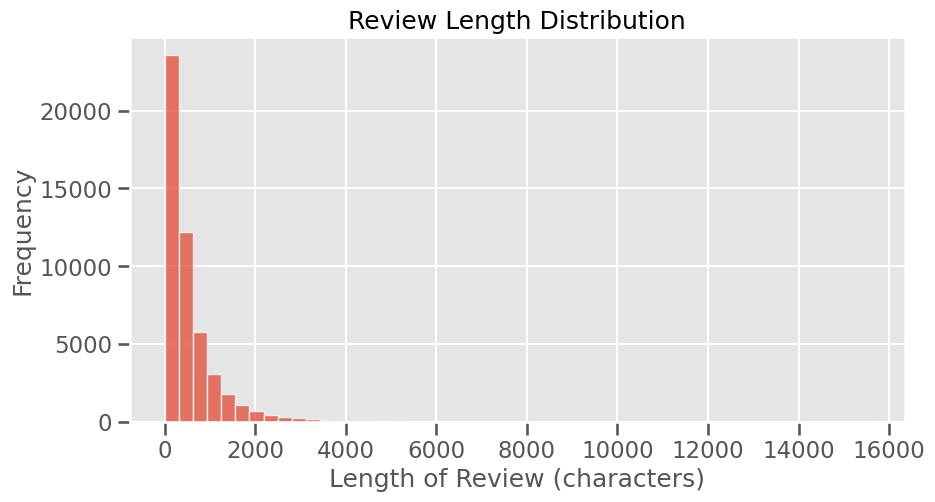

In [5]:
df['review_length'] = df['reviewText'].astype(str).apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Length of Review (characters)")
plt.ylabel("Frequency")
plt.show()

## Cell 6 — WordCloud of All Review Text

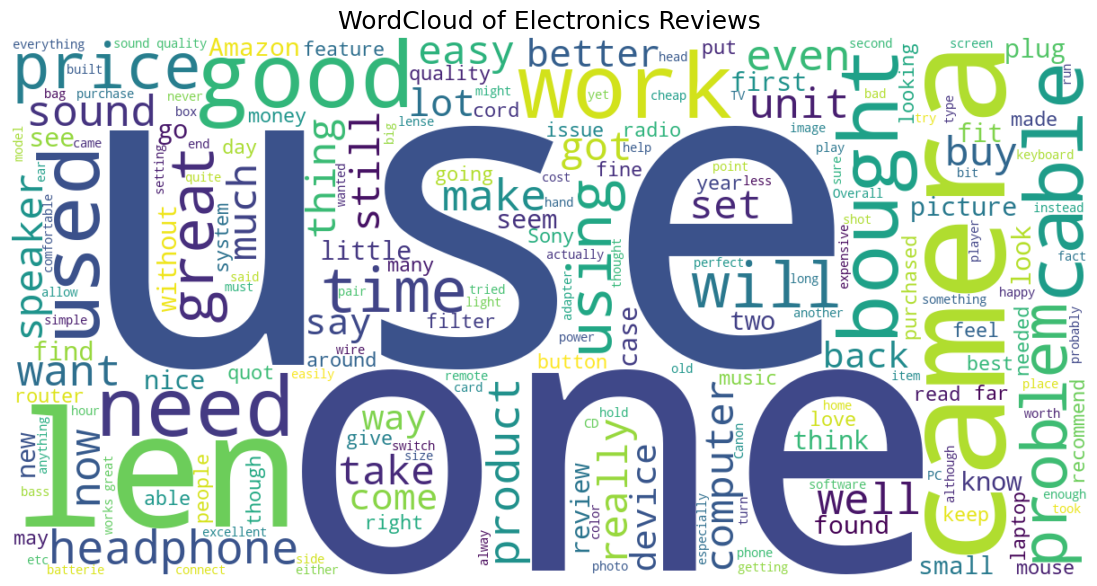

In [6]:
text = " ".join(df['reviewText'].astype(str).tolist())

wc = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Electronics Reviews")
plt.show()

## Cell 7 — Ratings Distribution (if available)

/var/folders/sf/8s5x9t956flghc58mb51nrnr0000gn/T/ipykernel_62785/130477600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['overall'], palette="viridis")


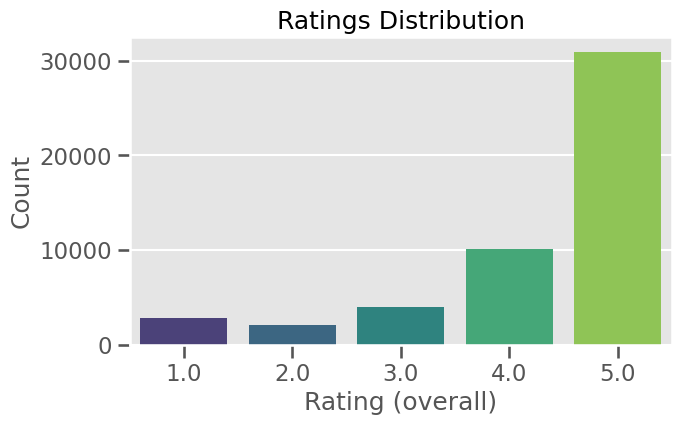

In [7]:
if 'overall' in df.columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=df['overall'], palette="viridis")
    plt.title("Ratings Distribution")
    plt.xlabel("Rating (overall)")
    plt.ylabel("Count")
    plt.show()
else:
    print("Ratings column 'overall' not found in dataset.")

## Cell 8 — Most Common Words

In [8]:
def clean_text(text):
    text = str(text).lower()
    return re.sub(r"[^a-z ]", " ", text)

corpus = " ".join(df['reviewText'].astype(str).apply(clean_text))

words = corpus.split()
word_counts = Counter(words)

word_counts.most_common(20)

[('the', 275526),
 ('i', 172867),
 ('and', 142757),
 ('a', 142724),
 ('to', 140150),
 ('it', 119471),
 ('is', 88002),
 ('of', 78933),
 ('for', 74881),
 ('this', 73218),
 ('you', 60065),
 ('in', 56821),
 ('that', 55825),
 ('my', 55059),
 ('with', 53582),
 ('on', 45456),
 ('have', 43037),
 ('but', 39253),
 ('not', 34902),
 ('t', 34755)]

## Cell 9 — Word Count Distribution

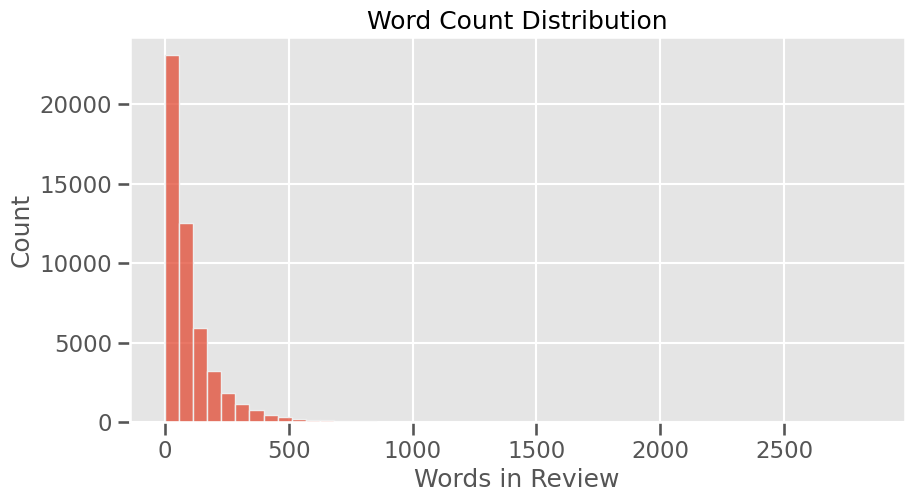

In [9]:
df['word_count'] = df['reviewText'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=50)
plt.title("Word Count Distribution")
plt.xlabel("Words in Review")
plt.ylabel("Count")
plt.show()

## Cell 10 — Summary of EDA Insights

In [10]:
print("Total number of reviews:", len(df))
print("Average review length (chars):", df['review_length'].mean())
print("Average word count:", df['word_count'].mean())
print("Median review length:", df['review_length'].median())

if 'overall' in df.columns:
    print("\nRating distribution:")
    print(df['overall'].value_counts())

Total number of reviews: 50000
Average review length (chars): 577.02774
Average word count: 105.25128
Median review length: 337.0

Rating distribution:
overall
5.0    30928
4.0    10108
3.0     3965
1.0     2837
2.0     2162
Name: count, dtype: int64
